<a href="https://colab.research.google.com/github/KEMAL-MUDIE/KEMAL-MUDIE/blob/main/Codeclose%20project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import warnings
warnings.filterwarnings('ignore')
!pip uninstall tensorflow
!pip install tensorflow

#!pip install --upgrade keras



Found existing installation: tensorflow 2.12.0
Uninstalling tensorflow-2.12.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.12.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.12.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 63.3 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [90]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
#from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.preprocessing.text import Tokenizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, SpatialDropout1D, LSTM


In [91]:
df=pd.read_csv(r'/content/Twitter_Data.csv')
df.head()


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [92]:
df.describe()


,category
count,162973.000000
mean,0.225436
std,0.781279
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [93]:
df.category.unique()

array([-1.,  0.,  1., nan])

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [95]:
df.isna().sum()

clean_text    4
category      7
dtype: int64

In [96]:
df[df['category'].isna()]

,clean_text,category
130448,the foundation stone northeast gas grid inaugu...,NaN
155642,dear terrorists you can run but you cant hide ...,NaN
155698,offense the best defence with mission shakti m...,NaN
155770,have always heard politicians backing out thei...,NaN
158693,modi government plans felicitate the faceless ...,NaN
159442,chidambaram gives praises modinomics,NaN
160559,the reason why modi contested from seats 2014 ...,NaN


In [97]:
df[df['clean_text'].isna()]

,clean_text,category
148,NaN,0.0
158694,NaN,-1.0
159443,NaN,0.0
160560,NaN,1.0


In [98]:
clean_df=df.drop(df[df['clean_text'].isna()].index, inplace=True)
cat_df=df.drop(df[df['category'].isna()].index, inplace=True)

In [99]:
from nltk.stem import WordNetLemmatizer
import re

def preprocess(textdata):
    processedText = []

    # Create Lemmatizer.
    wordLemm = WordNetLemmatizer()

    # Define regex patterns.
    urlPattern        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"  # Matches URLs
    userPattern       = '@[^\s]+'  # Matches usernames
    alphaPattern      = "[^a-zA-Z0-9]"  # Matches non-alphanumeric characters
    sequencePattern   = r"(.)\1\1+"  # Matches 3 or more consecutive letters
    seqReplacePattern = r"\1\1"  # Replaces 3 or more consecutive letters with 2 letters

    for tweet in textdata:
        tweet = tweet.lower()

        # Replace all URLs with 'URL'.
        tweet = re.sub(urlPattern, ' URL', tweet)

        # Replace all emojis with their descriptions.
        for emoji in emojis.keys():
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])

        # Replace @USERNAME with 'USER'.
        tweet = re.sub(userPattern, ' USER', tweet)

        # Replace all non-alphabetic characters with spaces.
        tweet = re.sub(alphaPattern, " ", tweet)

        # Replace 3 or more consecutive letters with 2 letters.
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            if len(word) > 1:  # Exclude words with a single character.
                # Lemmatize the word.
                word = wordLemm.lemmatize(word)
                tweetwords += (word + ' ')

        processedText.append(tweetwords)

    return processedText


In [100]:
def message_text_process(mess):
    no_punctuation = [char for char in mess if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return [word for word in no_punctuation.split() if word.lower()
            not in stopwords.words('english')]


In [101]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

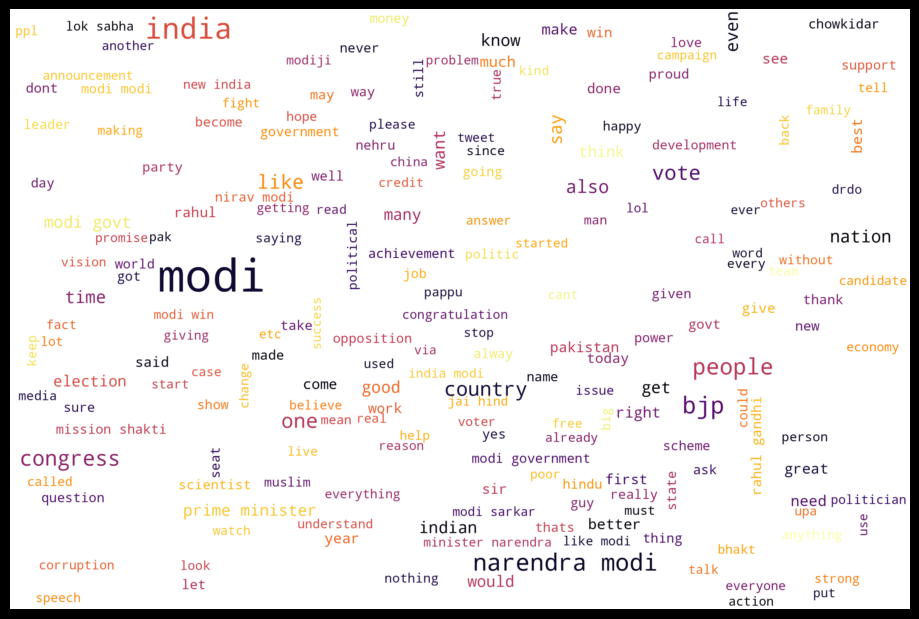

In [102]:
# Import the necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk

# Combine positive tweets into a single string
text = ''
for tweet in df[df['category'] == 1.0]['clean_text']:
    text += f" {tweet}"

# Create the WordCloud object with customized colors and text size
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='white',  # Change background color to white
    colormap='inferno',  # Change color map to inferno
    stopwords=set(nltk.corpus.stopwords.words("english")),
    max_font_size=150,  # Increase the maximum font size
).generate(text)

# Configure the figure size and appearance
fig = plt.figure(figsize=(10, 6), facecolor='black', edgecolor='black')  # Adjust the figure size and background color

# Display the word cloud with adjusted colors and text size
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

del text


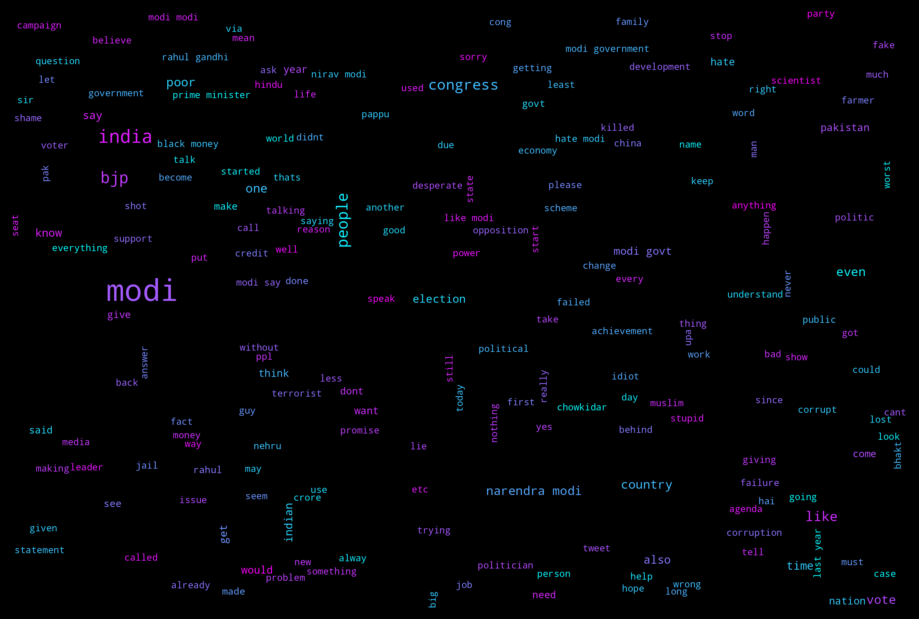

In [103]:
# Combine negative tweets into a single string
text = ''
for tweet in df[df['category'] == -1.0]['clean_text']:
    text += f" {tweet}"

# Create the WordCloud object with customized colors and text size
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='black',
    colormap='cool',  # Change color map to cool
    stopwords=set(nltk.corpus.stopwords.words("english")),
    max_font_size=100,  # Decrease the maximum font size
).generate(text)

# Configure the figure size and appearance
fig = plt.figure(figsize=(10, 6), facecolor='black', edgecolor='black')

# Display the word cloud with adjusted colors and text size
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

del text


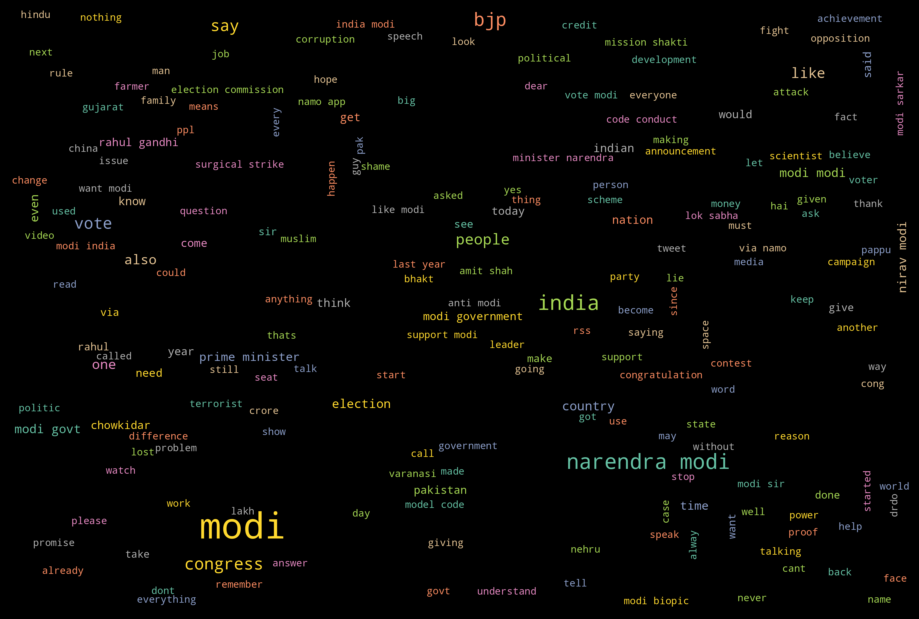

In [104]:
# Combine neutral tweets into a single string
text = ''
for tweet in df[df['category'] == 0.0]['clean_text']:
    text += f" {tweet}"

# Create the WordCloud object with customized colors and text size
wordcloud = WordCloud(
    width=3000,
    height=2000,
    background_color='black',
    colormap='Set2',  # Change color map to Set2
    stopwords=set(nltk.corpus.stopwords.words("english")),
    max_font_size=120,  # Decrease the maximum font size
).generate(text)

# Configure the figure size and appearance
fig = plt.figure(figsize=(10, 6), facecolor='black', edgecolor='black')

# Display the word cloud with adjusted colors and text size
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

del text


In [105]:
##count vectorizer
vec = CountVectorizer(max_features=10000)
vec.fit(df['clean_text'])

trn, val = train_test_split(df, test_size=0.3, random_state=42)

trn_abs = vec.transform(trn['clean_text'])
val_abs = vec.transform(val['clean_text'])

In [106]:
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(LogisticRegression(C = 10, n_jobs=-1))
clf.fit(trn_abs, trn['category'])

val_preds = clf.predict(val_abs)
f1_score(val['category'], val_preds, average='micro')

0.948947659078358

In [107]:
accuracy_score(val['category'], val_preds)

0.948947659078358

In [108]:
#confusion matrix
confusion_matrix(val['category'], val_preds)

array([[ 9572,   264,   855],
       [  198, 16215,   231],
       [  687,   261, 20608]])

In [109]:
classification_report(val['category'], val_preds)

'              precision    recall  f1-score   support\n\n        -1.0       0.92      0.90      0.91     10691\n         0.0       0.97      0.97      0.97     16644\n         1.0       0.95      0.96      0.95     21556\n\n    accuracy                           0.95     48891\n   macro avg       0.94      0.94      0.94     48891\nweighted avg       0.95      0.95      0.95     48891\n'

In [110]:
# TF-IDF vectorizer
vec = TfidfVectorizer(max_features=10000)  # Create TF-IDF vectorizer with maximum of 10,000 features
_ = vec.fit(list(df['clean_text']))  # Fit the vectorizer on the 'clean_text' column of the dataframe

# Transform the training and validation data using the TF-IDF vectorizer
trn_abs = vec.transform(trn['clean_text'])  # Transform the training data
val_abs = vec.transform(val['clean_text'])  # Transform the validation data


In [111]:
clf = OneVsRestClassifier(LogisticRegression(C = 10, n_jobs=-1))
_ = clf.fit(trn_abs, trn['category'])

val_preds = clf.predict(val_abs)
f1_score(val['category'], val_preds, average='micro')

0.9446523900104313

In [112]:
clf.score(val_abs, val['category'])

0.9446523900104313

In [113]:
import re

def decontracted(phrase):
    # specific contractions
    phrase = re.sub(r"won't", "will not", phrase)  # Replace "won't" with "will not"
    phrase = re.sub(r"can\'t", "can not", phrase)  # Replace "can't" with "can not"

    # general contractions
    phrase = re.sub(r"n\'t", " not", phrase)  # Replace "n't" with " not"
    phrase = re.sub(r"\'re", " are", phrase)  # Replace "'re" with " are"
    phrase = re.sub(r"\'s", " is", phrase)  # Replace "'s" with " is"
    phrase = re.sub(r"\'d", " would", phrase)  # Replace "'d" with " would"
    phrase = re.sub(r"\'ll", " will", phrase)  # Replace "'ll" with " will"
    phrase = re.sub(r"\'t", " not", phrase)  # Replace "'t" with " not"
    phrase = re.sub(r"\'ve", " have", phrase)  # Replace "'ve" with " have"
    phrase = re.sub(r"\'m", " am", phrase)  # Replace "'m" with " am"

    return phrase


In [114]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer
STOP_WORDS = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [115]:
from tqdm import tqdm
from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

def preprocess_text(text_data):
    preprocessed_text = []

    # tqdm is for printing the status bar
    for sentence in tqdm(text_data):
        # Decontract the sentence
        sent = decontracted(sentence)

        if type(sent) == type(''):
            # Remove HTML tags using BeautifulSoup
            example1 = BeautifulSoup(sent)
            sent = example1.get_text()

        # Replace special characters with spaces
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')

        # Remove non-alphanumeric characters
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)

        # Remove stopwords and convert to lowercase
        sent = ' '.join(e for e in sent.split() if e.lower() not in set(stopwords.words('english')))

        # Remove digits
        sent = re.sub("[\d-]", '', sent)

        # Stemming using PorterStemmer
        porter = PorterStemmer()
        sent = ' '.join(porter.stem(e) for e in sent.split())

        # Append the preprocessed sentence to the list
        preprocessed_text.append(sent.lower().strip())

    return preprocessed_text


In [116]:
columns=df.columns.values
new_column_names=[]
for i in columns:
    s=i.split()
    d=[]
    for j in s:
        if j==':' or j=='.' or j=='(S)' or j=='(D)':
            pass
        else:
            d.append(j)
    final='_'.join(d)
    new_column_names.append(final)

In [117]:
df.columns=new_column_names

In [118]:
remove_dots=[]
for i in df.columns.values:
  remove_dots.append(i.strip('.'))

In [119]:
df.columns=remove_dots

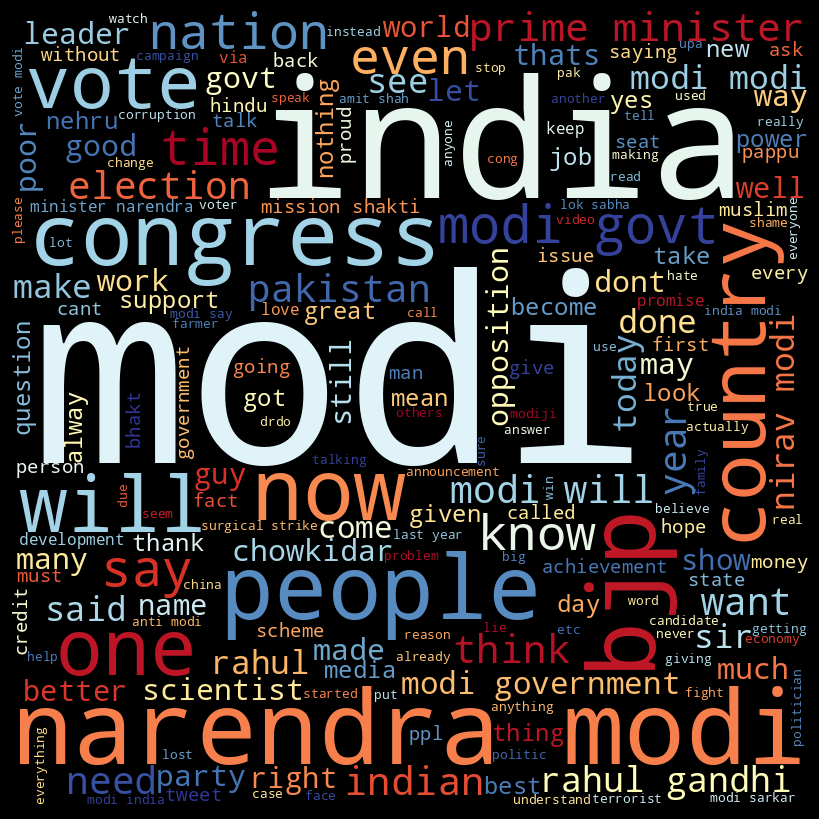

In [136]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the essay column
for val in df['clean_text'].values:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width=800, height=800, background_color='black', stopwords=stopwords, min_font_size=8, colormap='RdYlBu').generate(comment_words)

# plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


In [130]:

# tokenize
tok = Tokenizer(num_words = 1000000)
# fit
tok.fit_on_texts(df['clean_text'].str.lower().tolist())

vocab_size = len(tok.word_index) + 1

In [135]:
X_trn = tok.texts_to_sequences(trn['clean_text'])
X_val = tok.texts_to_sequences(val)


In [ ]:
maxlen = 200
X_trn = pad_sequences(X_trn, maxlen=maxlen)
X_val = pad_sequences(X_val, maxlen=maxlen)

In [132]:
embedding_dim = 50
vocab_size = len(tok.word_index) + 1

model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    input_length=maxlen))

model.add(Flatten())
model.add(Dense(200, activation='relu', name = 'Fully_Connected'))
model.add(Dense(1, activation='sigmoid', name = 'Output'))
model.compile(optimizer=tf.keras.optimizers.Adam(lr = 1e-3),
              loss='binary_crossentropy',
              metrics=['accuracy'],
              )

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 200, 50)           5683950   
                                                                 
 flatten_3 (Flatten)         (None, 10000)             0         
                                                                 
 Fully_Connected (Dense)     (None, 200)               2000200   
                                                                 
 Output (Dense)              (None, 1)                 201       
                                                                 
Total params: 7,684,351
Trainable params: 7,684,351
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


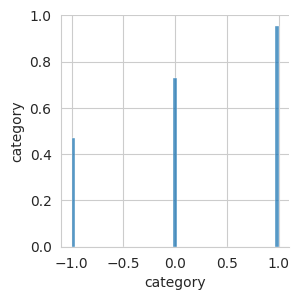

In [141]:
sns.set_style("whitegrid")
sns.pairplot(df[['clean_text','category']], size=3)
plt.show()

<ipython-input-143-aaa502b2a2a9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['category'])


<Axes: xlabel='category', ylabel='Density'>

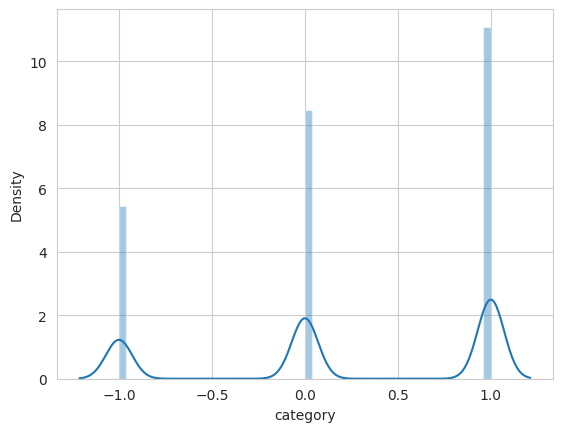

In [143]:
sns.distplot(df['category'])

<ipython-input-144-bda1a0304f9f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

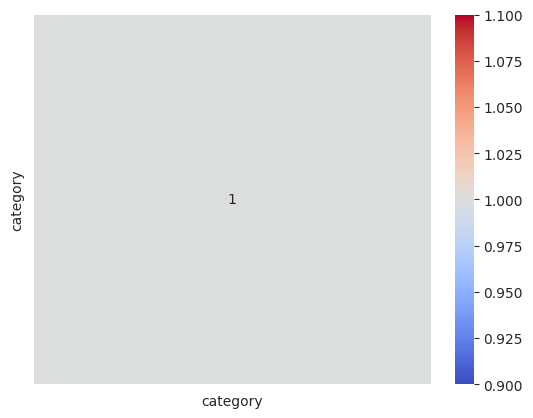

In [144]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')